## Business Intelligence Assignment 2: Data Analytics

### (4) Modeling Regression

In [ ]:
%pip install numpy
%pip install pandas
%pip install seaborn
%pip install matplotlib
%pip install scikit-learn
%pip install dbrepo

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

from dbrepo.RestClient import RestClient
from sklearn.feature_selection import RFE

import os
import pickle

In [3]:
SEED = 42

### (a) Loading Data

In [4]:
client = RestClient(endpoint="https://test.dbrepo.tuwien.ac.at", username="e12327971@student.tuwien.ac.at", password="Dortmund09-BVB")
df = client.get_identifier_data(identifier_id="58f1600e-46c7-43c4-86b7-c5a46a114cf5")
df.set_index('id', inplace=True)
df

print(df.index)
display(df)

print(df.dtypes)

Index(['958', '3686', '4197', '4967', '5589', '5858', '6165', '7103', '8142',
       '8339',
       ...
       '837914815036021927', '837977895002205614', '838436486814441342',
       '838495712443108431', '838666058552532866', '838706509335675864',
       '839096115650829294', '839109880343709030', '839315875333113233',
       '839330745722153339'],
      dtype='object', name='id', length=8000)


,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city
id,,,,,,,,,,,,,,,
958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,94117,37.770280000000000000,-122.433170000000000000,Entire home/apt,202,2,383,2023-02-19,2.310000000000000000,1,128,59,San Francisco
3686,Vita's Hideaway,4645,20020,38.863390000000000000,-76.988890000000000000,Private room,67,31,81,2022-07-06,0.540000000000000000,1,211,2,Washington D.C.
4197,Capitol Hill Bedroom walk to Metro,5061,20003,38.887190000000000000,-76.994720000000000000,Private room,90,14,52,2022-11-09,0.310000000000000000,1,319,7,Washington D.C.
4967,"DC, Near Metro",7086,20002,38.912170000000000000,-76.992490000000000000,Private room,500,1125,31,2016-09-22,0.210000000000000000,3,365,0,Washington D.C.
5589,Cozy apt in Adams Morgan,6527,20009,38.918870000000000000,-77.040080000000000000,Entire home/apt,75,42,95,2020-03-05,0.580000000000000000,1,106,0,Washington D.C.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838706509335675864,Noe Vally entire guest suite downtown view,130343524,94131,37.746006316244880000,-122.436712319365160000,Entire home/apt,153,1,0,0,0E-18,3,35,0,San Francisco
839096115650829294,Unit 14,43533135,94103,37.779502866208450000,-122.407300311200300000,Private room,68,1,0,0,0E-18,6,361,0,San Francisco
839109880343709030,Beautiful 3Br 2.5 Bath Edwardian,15131298,94121,37.775526600000000000,-122.505526300000000000,Entire home/apt,268,3,0,0,0E-18,1,97,0,San Francisco


name                              object
host_id                           object
neighbourhood                     object
latitude                          object
longitude                         object
room_type                         object
price                             object
minimum_nights                    object
number_of_reviews                 object
last_review                       object
reviews_per_month                 object
calculated_host_listings_count    object
availability_365                  object
number_of_reviews_ltm             object
city                              object
dtype: object


In [5]:
df_test = client.get_identifier_data(identifier_id="cd56d6c7-8041-4d30-b370-2522b1f5fe36")
df_test.set_index('id', inplace=True)
df_test

print(df_test.index)
display(df_test)

print(df_test.dtypes)

Index(['3943', '12042', '21334', '24712', '27028', '29557', '39418', '42060',
       '51773', '53280',
       ...
       '831353555397223083', '833400394714397974', '833620265884756491',
       '834263661399397845', '835546710712508711', '835592277755731703',
       '836368993217643985', '836465882823481753', '836682391855028408',
       '837735439615147340'],
      dtype='object', name='id', length=2000)


,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city
id,,,,,,,,,,,,,,,
3943,Historic Rowhouse Near Monuments,5059,20002,38.911950000000000000,-77.004560000000000000,Private room,85,1,455,2023-03-12,2.700000000000000000,5,289,17,Washington D.C.
12042,Sunny/Sunset view room UCSF/USF - San Francisco*,21994,94117,37.769320000000000000,-122.447230000000000000,Private room,65,32,5,2015-10-18,0.040000000000000000,13,365,0,San Francisco
21334,Studio loft on top of Russian Hill,81455,94109,37.796200000000000000,-122.415620000000000000,Entire home/apt,149,30,124,2022-07-01,0.790000000000000000,1,357,2,San Francisco
24712,"Relaxing, Spacious, Private, Walkable in Petwo...",100727,20011,38.947710000000000000,-77.023680000000000000,Entire home/apt,200,4,174,2023-03-12,1.240000000000000000,2,142,33,Washington D.C.
27028,Secret Mission Garden,7149,94110,37.760050000000000000,-122.422080000000000000,Private room,164,1,26,2019-11-21,0.280000000000000000,2,0,0,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835592277755731703,Light-filled Sanctuary in SF,140152985,94118,37.785637048422150000,-122.473260755735520000,Entire home/apt,200,30,0,0,0E-18,1,149,0,San Francisco
836368993217643985,Powell Place One Bedroom on Nob Hill,495900269,94108,37.792298478924340000,-122.408116091134840000,Entire home/apt,191,1,0,0,0E-18,5,20,0,San Francisco
836465882823481753,2BR/2BD Studio w/ Free Parking & Fenced Yard,47504410,94124,37.717997842046266000,-122.390197863995550000,Entire home/apt,123,1,1,2023-03-05,1.000000000000000000,1,88,1,San Francisco


name                              object
host_id                           object
neighbourhood                     object
latitude                          object
longitude                         object
room_type                         object
price                             object
minimum_nights                    object
number_of_reviews                 object
last_review                       object
reviews_per_month                 object
calculated_host_listings_count    object
availability_365                  object
number_of_reviews_ltm             object
city                              object
dtype: object


In [6]:
int_cols = [
    'host_id',
    'neighbourhood',
    'minimum_nights',
    'number_of_reviews',
    'calculated_host_listings_count',
    'availability_365',
    'number_of_reviews_ltm',
    'price'
]

float_cols = [
    'latitude',
    'longitude',
    'reviews_per_month'
]

df[int_cols] = df[int_cols].apply(pd.to_numeric, errors='coerce')

df[int_cols] = df[int_cols].astype('int64')

df[float_cols] = df[float_cols].apply(pd.to_numeric, errors='coerce')
df[float_cols] = df[float_cols].astype('float64')

print(df.dtypes)

name                               object
host_id                             int64
neighbourhood                       int64
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
city                               object
dtype: object


In [7]:
df_test[int_cols] = df_test[int_cols].apply(pd.to_numeric, errors='coerce')

df_test[int_cols] = df_test[int_cols].astype('int64')

df_test[float_cols] = df_test[float_cols].apply(pd.to_numeric, errors='coerce')
df_test[float_cols] = df_test[float_cols].astype('float64')

print(df_test.dtypes)

name                               object
host_id                             int64
neighbourhood                       int64
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
city                               object
dtype: object


### Encoding additional variables

In [8]:
# Label Encoding was originally moved to pre processing, but needs to be in this notebook, otherwise subsequent functions will break

labelEnc = LabelEncoder()
df['city'] = labelEnc.fit_transform(df['city'])
df['room_type'] = labelEnc.fit_transform(df['room_type'])
print(df[['neighbourhood', 'room_type', 'city']].dtypes)

df_test['city'] = labelEnc.fit_transform(df_test['city'])
df_test['room_type'] = labelEnc.fit_transform(df_test['room_type'])
print(df_test[['neighbourhood', 'room_type', 'city']].dtypes)

neighbourhood    int64
room_type        int32
city             int32
dtype: object
neighbourhood    int64
room_type        int32
city             int32
dtype: object



 creating scatterplots...


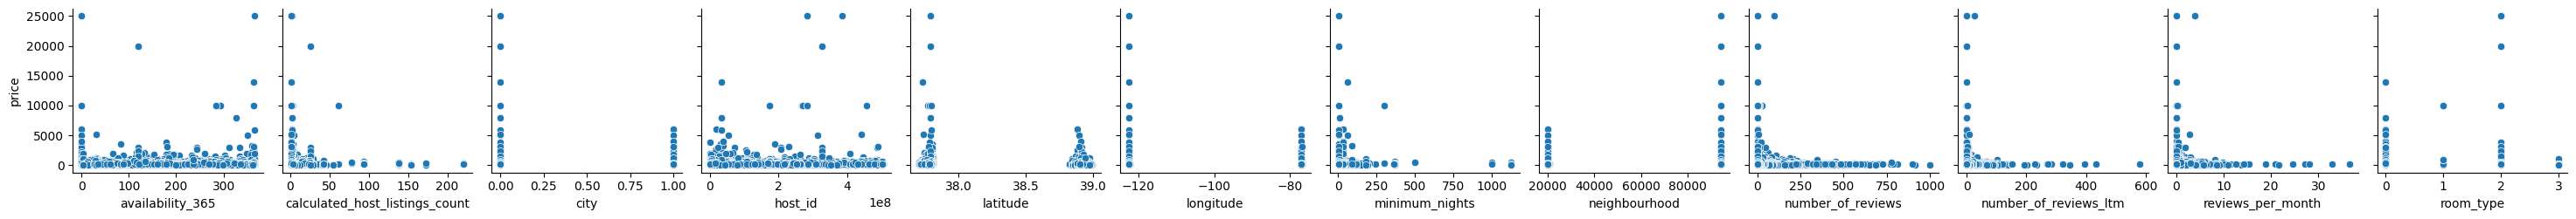

In [9]:
def create_seaborn_scatterplots(data):
    print('\n creating scatterplots...')
    data_copy = data.copy()
    
    numeric_data = data_copy.select_dtypes(include=['number'])
    sns.pairplot(numeric_data, y_vars='price', x_vars=numeric_data.columns.difference(['price']))
    plt.show()
    
create_seaborn_scatterplots(df)

### (b) ANOVA Analysis

In [10]:
from sklearn.feature_selection import SelectKBest, f_regression

def perform_ANOVA(data):
    df_copy = data.copy().select_dtypes(include='number')
    target_feature = df_copy['price']
    predictors = df_copy.drop(columns='price')
    

    selector = SelectKBest(score_func=f_regression, k='all')
    selector.fit(predictors, target_feature)
    
    feature_score = pd.DataFrame({'Feature': predictors.columns, 'Score': selector.scores_})
    print(feature_score.sort_values(by='Score', ascending=False))
    
perform_ANOVA(df)

                           Feature      Score
0                          host_id  61.131833
11                            city  31.422530
1                    neighbourhood  31.405022
3                        longitude  31.341483
2                         latitude  27.961416
6                number_of_reviews  27.919959
7                reviews_per_month  25.858810
10           number_of_reviews_ltm  19.580498
4                        room_type  15.108757
5                   minimum_nights  11.302649
8   calculated_host_listings_count   6.197745
9                 availability_365   1.542996


### (c) Correlation Matrix


Creating correlation matrix...


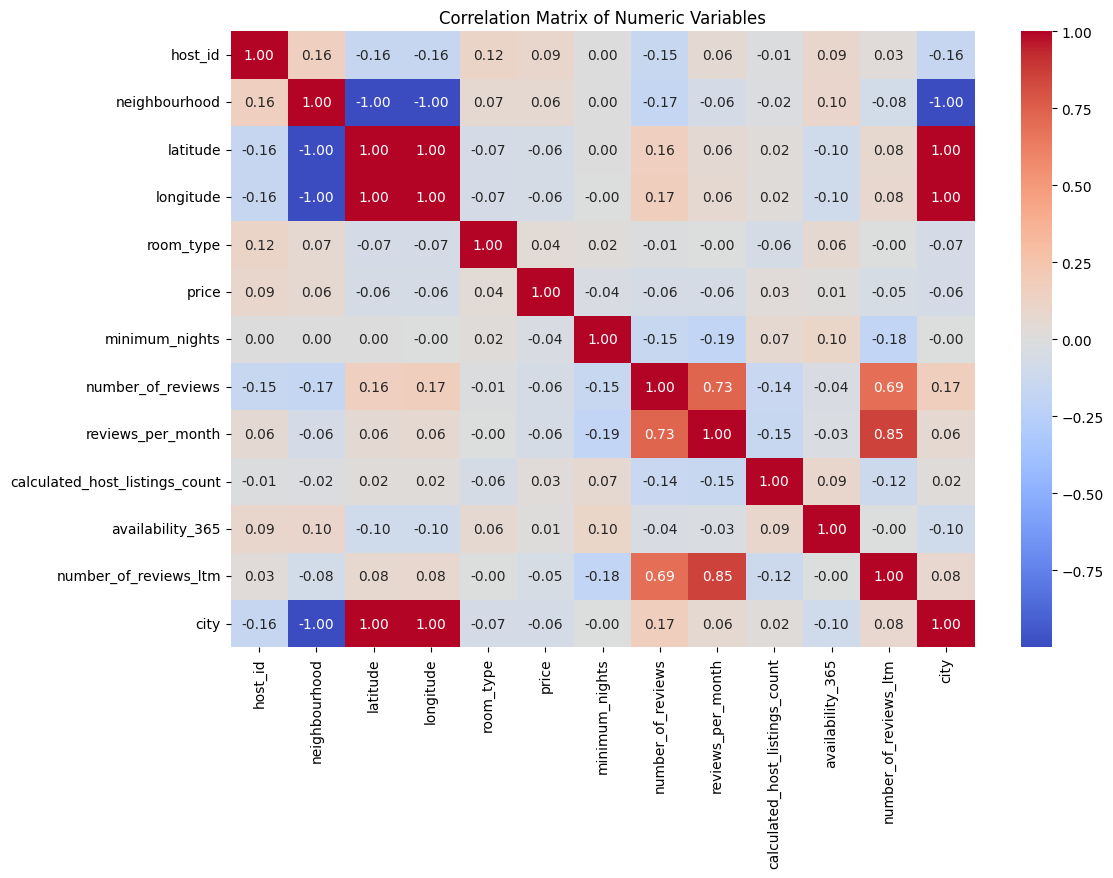

In [11]:
def create_correlation_matrix(data):
    print("\nCreating correlation matrix...")
    numeric_data = data.select_dtypes(include=["number"])
    correlation_matrix = numeric_data.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Correlation Matrix of Numeric Variables")
    plt.show()

create_correlation_matrix(df)

In [12]:
def apply_RFE(data):
    df_copy = data.copy().select_dtypes(include='number')
    target_feature = df_copy['price']
    predictors = df_copy.drop(columns='price')
    
    model = RandomForestRegressor(max_depth=10, min_samples_split=8, n_estimators=200)
    
    rfe = RFE(estimator=model, n_features_to_select=5)
    rfe.fit(predictors, target_feature)
    
    feature_ranking = pd.DataFrame({'Feature': predictors.columns, 'Ranking': rfe.ranking_})
    print(feature_ranking.sort_values(by='Ranking'))
    
#apply_RFE(df)

### (d) Box-plots 


Creating boxplots for data distributions...


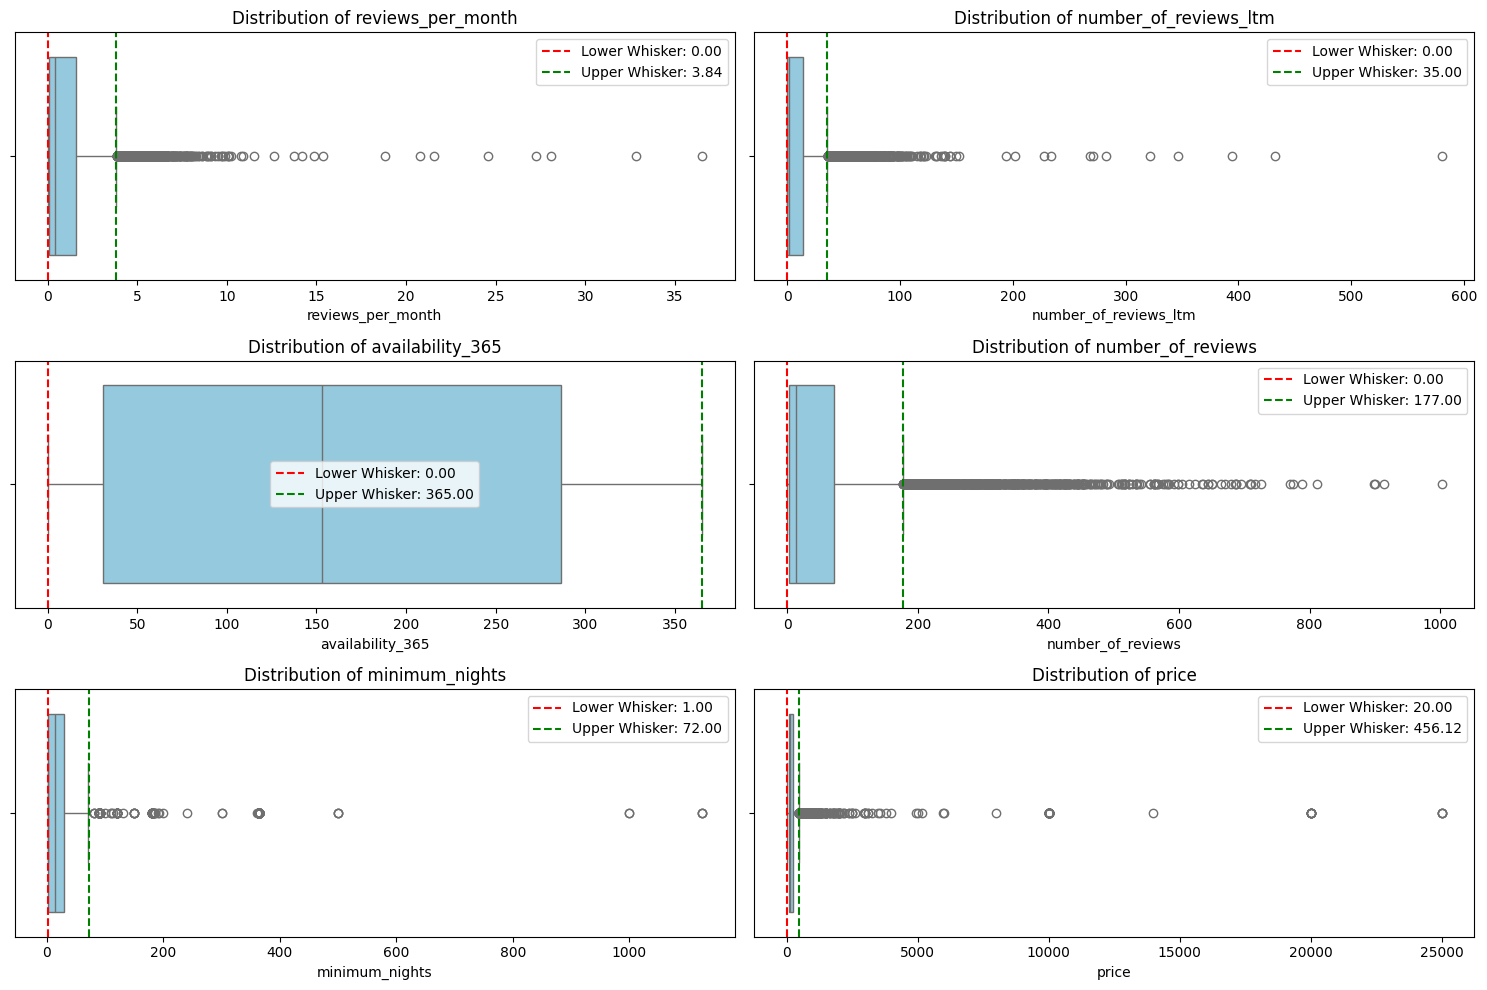

In [13]:
def visualize_distributions_with_whiskers(data):
    columns_to_plot = ['reviews_per_month', 'number_of_reviews_ltm', 'availability_365', 'number_of_reviews', 'minimum_nights', 'price']
    print("\nCreating boxplots for data distributions...")
    plt.figure(figsize=(15, 10))

    for i, column in enumerate(columns_to_plot, 1):
        plt.subplot(3, 2, i)
        sns.boxplot(x=data[column], color='skyblue')
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)

        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        lower_whisker = max(data[column].min(), q1 - 1.5 * iqr)
        upper_whisker = min(data[column].max(), q3 + 1.5 * iqr)

        plt.axvline(lower_whisker, color='red', linestyle='--', label=f'Lower Whisker: {lower_whisker:.2f}')
        plt.axvline(upper_whisker, color='green', linestyle='--', label=f'Upper Whisker: {upper_whisker:.2f}')
        plt.legend()

    plt.tight_layout()
    plt.show()

visualize_distributions_with_whiskers(df)

### (f) Pipeline (Split, cross-validation) 

In [14]:
def process_pipeline(data, apply_outlier_removal=False, model_type="linear_regression"):
    if apply_outlier_removal:
        print("\nRemoving outliers based on thresholds...")
        thresholds = {
            'reviews_per_month': (0,4.9),
            'number_of_reviews': (0, 106),
            'availability_365': (0, 365),
            'number_of_reviews_ltm': (0, 40),
            'minimum_nights': (1, 72),
            'price': (5, 488.5)
        }
        for column, (min_val, max_val) in thresholds.items():
            if column in data.columns:
                data = data[(data[column] >= min_val) & (data[column] <= max_val)]

    def stratified_split(data, fraction=0.1):
        
        #Values based on RFE
        #X = data[['latitude','longitude', 'calculated_host_listings_count', 'reviews_per_month', 'neighbourhood']]
        # values based on ANOVA
        X = data[['latitude', 'room_type', 'reviews_per_month', 'longitude', 'neighbourhood', 'number_of_reviews_ltm', 'availability_365', 'number_of_reviews', 'minimum_nights']]
        y = data['price']
        X_sampled, _, y_sampled, _ = train_test_split(X, y, test_size=(1 - fraction), random_state=SEED, stratify=pd.qcut(y, q=4, duplicates='drop'))
        return X_sampled, y_sampled

    X_sampled, y_sampled = stratified_split(data)

    def scale_features(X):
        scaler = RobustScaler()
        X_scaled = scaler.fit_transform(X)
        return X_scaled, scaler

    X_sampled_scaled, scaler = scale_features(X_sampled)

    if model_type == "linear_regression":
        def train_linear_regression(X_sampled, y_sampled):
            lr = LinearRegression()
            lr.fit(X_sampled, y_sampled)
            return lr

        print("Training Linear Regression...")
        model = train_linear_regression(X_sampled_scaled, y_sampled)

    elif model_type == "random_forest":
        def cross_validate_and_train(X_sampled, y_sampled):
            rf = RandomForestRegressor(random_state=SEED)
            param_grid = {
                'n_estimators': [50, 100,  200],
                'max_depth': [None, 5, 10, 15],
                'min_samples_split': [2, 5, 8]
            }

            grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring='r2', n_jobs=-1)
            grid_search.fit(X_sampled, y_sampled)

            print("\nBest Hyperparameters from Cross-Validation:")
            print(grid_search.best_params_)

            return grid_search.best_estimator_

        print("Training Random Forest...")
        model = cross_validate_and_train(X_sampled_scaled, y_sampled)
        
    def evaluate_model_on_datasets(model, X_train, y_train, X_test, y_test):
        # Modellvorhersagen
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
    
        # Training Performance
        mse_train = mean_squared_error(y_train, y_pred_train)
        r2_train = r2_score(y_train, y_pred_train)
    
        print("\nTraining Data Evaluation:")
        print(f"Mean Squared Error (MSE): {mse_train:.2f}")
        print(f"R^2 Score: {r2_train:.2f}")
    
        # Test Performance
        mse_test = mean_squared_error(y_test, y_pred_test)
        r2_test = r2_score(y_test, y_pred_test)
    
        print("\nTest Data Evaluation:")
        print(f"Mean Squared Error (MSE): {mse_test:.2f}")
        print(f"R^2 Score: {r2_test:.2f}")
    
        # Baseline-Berechnung
        mean_baseline = np.full_like(y_test, y_train.mean())
        median_baseline = np.full_like(y_test, np.median(y_train))
    
        mse_mean_baseline = mean_squared_error(y_test, mean_baseline)
        mse_median_baseline = mean_squared_error(y_test, median_baseline)
    
        print("\nBaseline Performance on Test Data:")
        print(f"Mean Predictor - MSE: {mse_mean_baseline:.2f}, R^2: {r2_score(y_test, mean_baseline):.2f}")
        print(f"Median Predictor - MSE: {mse_median_baseline:.2f}, R^2: {r2_score(y_test, median_baseline):.2f}")
    
        # Vergleich mit Baseline
        print("\nComparison with Baseline:")
        print(f"Improvement over Mean Baseline - MSE: {mse_mean_baseline - mse_test:.2f}")
        print(f"Improvement over Median Baseline - MSE: {mse_median_baseline - mse_test:.2f}")
        
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test, y_pred_test, alpha=0.5, color='skyblue', edgecolors='k', label='Predicted vs Actual')
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
        plt.xlabel('Actual Price')
        plt.ylabel('Predicted Price')
        plt.title('Regression Line Plot: Predicted vs Actual')
        plt.legend()
        plt.show()

    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=SEED)
    X_train_scaled_split, scaler_train_split = scale_features(X_train_split)
    X_test_scaled_split = scaler_train_split.transform(X_test_split)

    evaluate_model_on_datasets(model, X_train_scaled_split, y_train_split, X_test_scaled_split, y_test_split)

    return model, scaler

### (g) Identifying subgroup bias

In [15]:
def evaluate_bias_by_subgroup(data, protected_attribute):
    subgroups = data[protected_attribute].unique()

    print("\nEvaluating bias for protected attribute:", protected_attribute)

    for subgroup in subgroups:
        print(f"\nSubgroup: {subgroup}")

        # Filter data for the subgroup
        subgroup_data = data[data[protected_attribute] == subgroup]
        X = subgroup_data[['latitude', 'room_type', 'reviews_per_month', 'longitude', 'neighbourhood', 'number_of_reviews_ltm']]
        y = subgroup_data['price']

        # Train-Test Split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

        # Scaling
        scaler = RobustScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Train the model
        rf = RandomForestRegressor(random_state=SEED, n_estimators=200, max_depth=10, min_samples_split=8)
        rf.fit(X_train_scaled, y_train)

        # Predictions
        y_pred_test = rf.predict(X_test_scaled)

        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred_test)
        r2 = r2_score(y_test, y_pred_test)

        # Print metrics for the subgroup
        print(f"  MSE: {mse:.2f}")
        print(f"  R^2: {r2:.2f}")

        
evaluate_bias_by_subgroup(df, 'room_type')

room_type_mapping = dict(enumerate(labelEnc.classes_))
print("Subgroup mapping for 'room_type':", room_type_mapping)



Evaluating bias for protected attribute: room_type

Subgroup: 0
  MSE: 90358.19
  R^2: 0.02

Subgroup: 2
  MSE: 2338455.82
  R^2: 0.23

Subgroup: 3
  MSE: 8850.74
  R^2: -0.01

Subgroup: 1
  MSE: 6643923.21
  R^2: 0.22
Subgroup mapping for 'room_type': {0: 'Entire home/apt', 1: 'Hotel room', 2: 'Private room', 3: 'Shared room'}


### (h) Pipeline Execution


--- Linear Regression without Outlier Thresholds ---
Training Linear Regression...

Training Data Evaluation:
Mean Squared Error (MSE): 1248480.12
R^2 Score: 0.02

Test Data Evaluation:
Mean Squared Error (MSE): 54710.08
R^2 Score: -0.77

Baseline Performance on Test Data:
Mean Predictor - MSE: 41471.20, R^2: -0.35
Median Predictor - MSE: 33511.95, R^2: -0.09

Comparison with Baseline:
Improvement over Mean Baseline - MSE: -13238.88
Improvement over Median Baseline - MSE: -21198.13


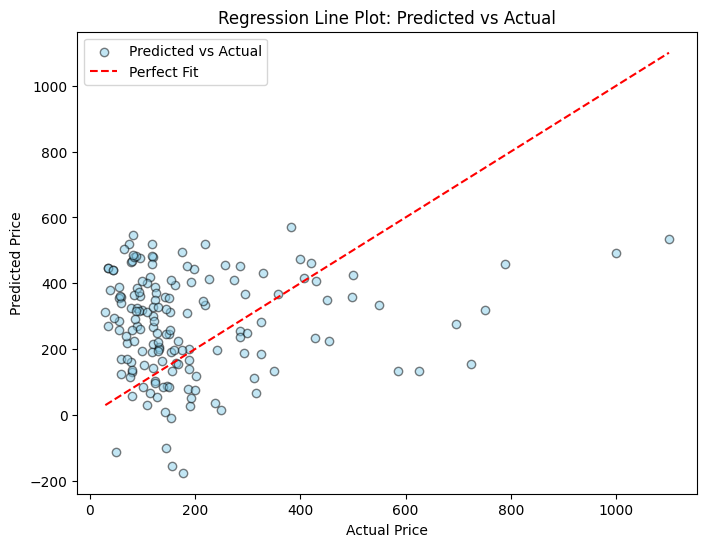


--- Linear Regression with Outlier Thresholds ---

Removing outliers based on thresholds...
Training Linear Regression...

Training Data Evaluation:
Mean Squared Error (MSE): 7694.05
R^2 Score: 0.20

Test Data Evaluation:
Mean Squared Error (MSE): 7957.78
R^2 Score: 0.24

Baseline Performance on Test Data:
Mean Predictor - MSE: 10460.32, R^2: -0.00
Median Predictor - MSE: 11360.32, R^2: -0.09

Comparison with Baseline:
Improvement over Mean Baseline - MSE: 2502.54
Improvement over Median Baseline - MSE: 3402.54


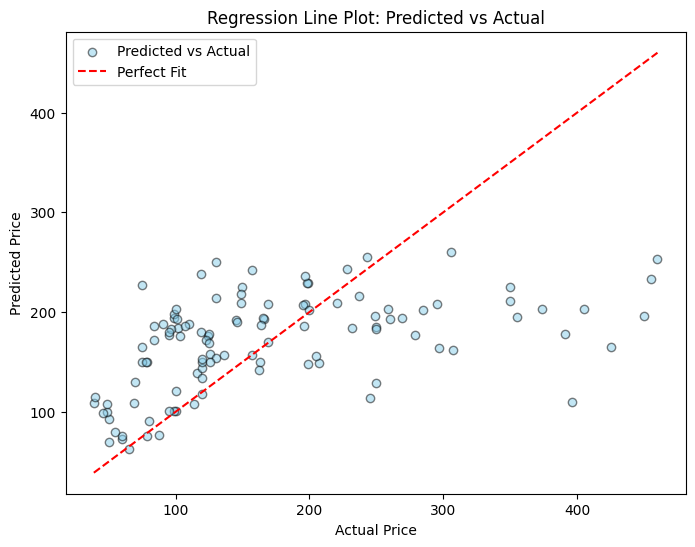


--- Random Forest without Outlier Thresholds ---
Training Random Forest...

Best Hyperparameters from Cross-Validation:
{'max_depth': 5, 'min_samples_split': 8, 'n_estimators': 200}

Training Data Evaluation:
Mean Squared Error (MSE): 726338.63
R^2 Score: 0.43

Test Data Evaluation:
Mean Squared Error (MSE): 22760.61
R^2 Score: 0.26

Baseline Performance on Test Data:
Mean Predictor - MSE: 41471.20, R^2: -0.35
Median Predictor - MSE: 33511.95, R^2: -0.09

Comparison with Baseline:
Improvement over Mean Baseline - MSE: 18710.59
Improvement over Median Baseline - MSE: 10751.34


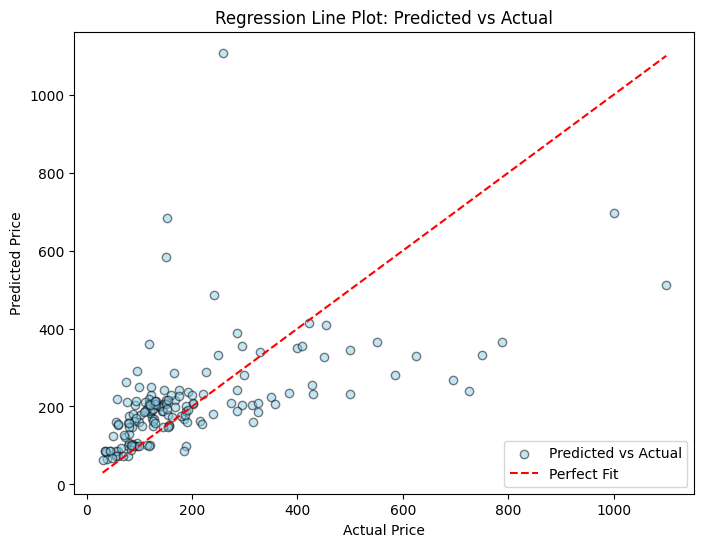


--- Random Forest with Outlier Thresholds ---

Removing outliers based on thresholds...
Training Random Forest...

Best Hyperparameters from Cross-Validation:
{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}

Training Data Evaluation:
Mean Squared Error (MSE): 4744.12
R^2 Score: 0.50

Test Data Evaluation:
Mean Squared Error (MSE): 4872.21
R^2 Score: 0.53

Baseline Performance on Test Data:
Mean Predictor - MSE: 10460.32, R^2: -0.00
Median Predictor - MSE: 11360.32, R^2: -0.09

Comparison with Baseline:
Improvement over Mean Baseline - MSE: 5588.11
Improvement over Median Baseline - MSE: 6488.11


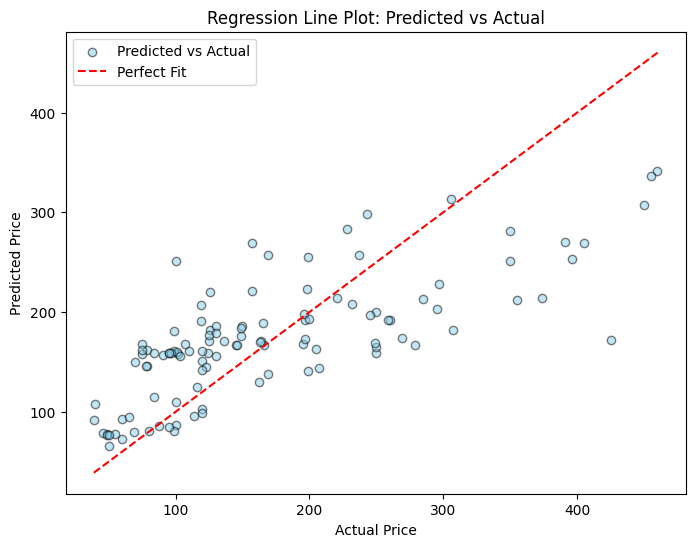

(RandomForestRegressor(max_depth=5, n_estimators=200, random_state=42),
 RobustScaler())

In [16]:
print("\n--- Linear Regression without Outlier Thresholds ---")
process_pipeline(df.copy(), apply_outlier_removal=False, model_type="linear_regression")

print("\n--- Linear Regression with Outlier Thresholds ---")
process_pipeline(df.copy(), apply_outlier_removal=True, model_type="linear_regression")

# Random Forest Process
print("\n--- Random Forest without Outlier Thresholds ---")
process_pipeline(df.copy(), apply_outlier_removal=False, model_type="random_forest")

print("\n--- Random Forest with Outlier Thresholds ---")
process_pipeline(df.copy(), apply_outlier_removal=True, model_type="random_forest")

### (i) Test


--- LR without Outlier ---
Training Linear Regression...

Training Data Evaluation:
Mean Squared Error (MSE): 1248480.12
R^2 Score: 0.02

Test Data Evaluation:
Mean Squared Error (MSE): 54710.08
R^2 Score: -0.77

Baseline Performance on Test Data:
Mean Predictor - MSE: 41471.20, R^2: -0.35
Median Predictor - MSE: 33511.95, R^2: -0.09

Comparison with Baseline:
Improvement over Mean Baseline - MSE: -13238.88
Improvement over Median Baseline - MSE: -21198.13


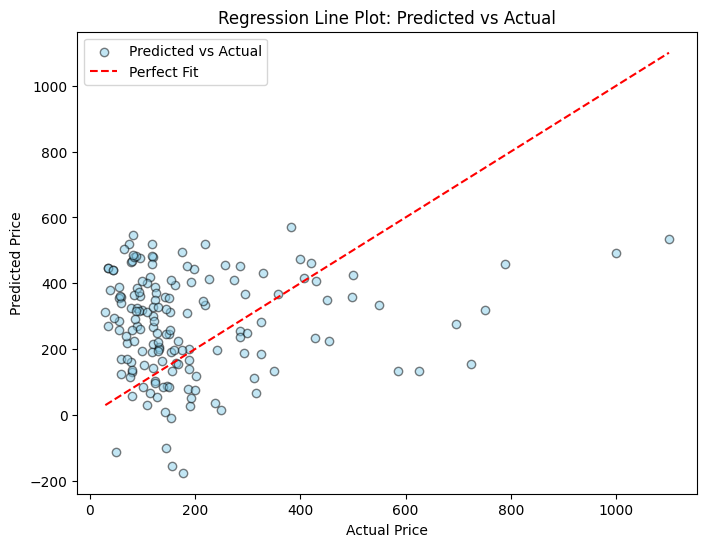

Test MSE: 859896.51 | Test R²: 0.01


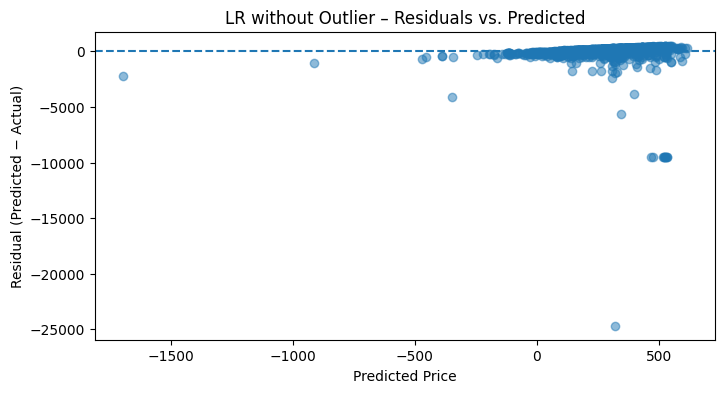

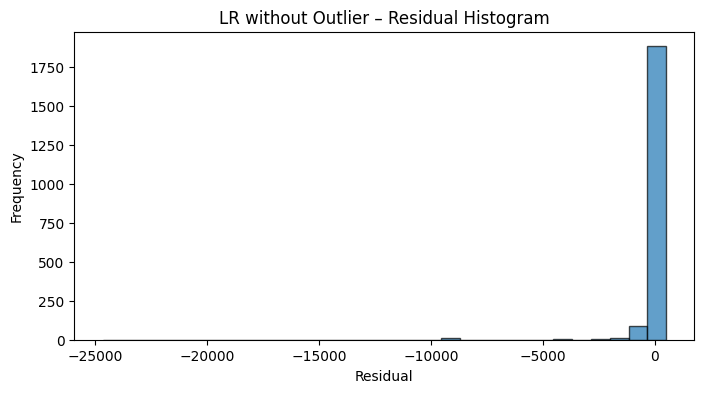

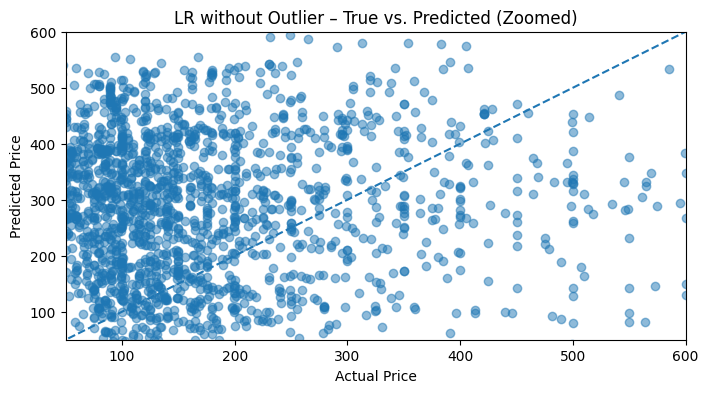


--- LR with Outlier ---

Removing outliers based on thresholds...
Training Linear Regression...

Training Data Evaluation:
Mean Squared Error (MSE): 7694.05
R^2 Score: 0.20

Test Data Evaluation:
Mean Squared Error (MSE): 7957.78
R^2 Score: 0.24

Baseline Performance on Test Data:
Mean Predictor - MSE: 10460.32, R^2: -0.00
Median Predictor - MSE: 11360.32, R^2: -0.09

Comparison with Baseline:
Improvement over Mean Baseline - MSE: 2502.54
Improvement over Median Baseline - MSE: 3402.54


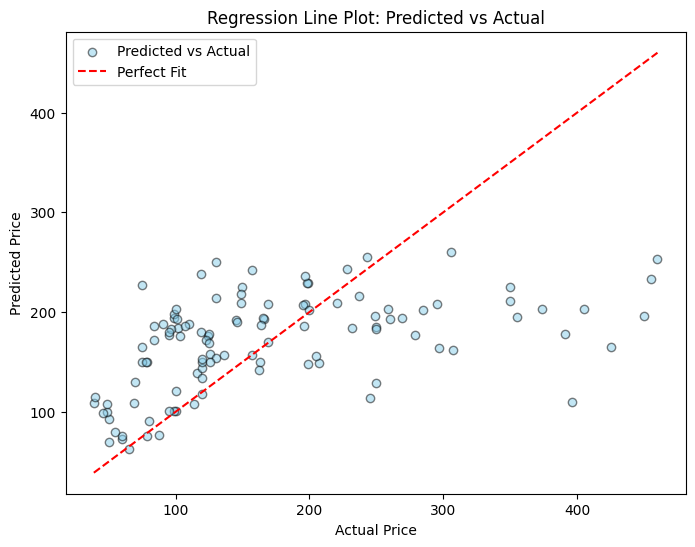

Test MSE: 886245.73 | Test R²: -0.02


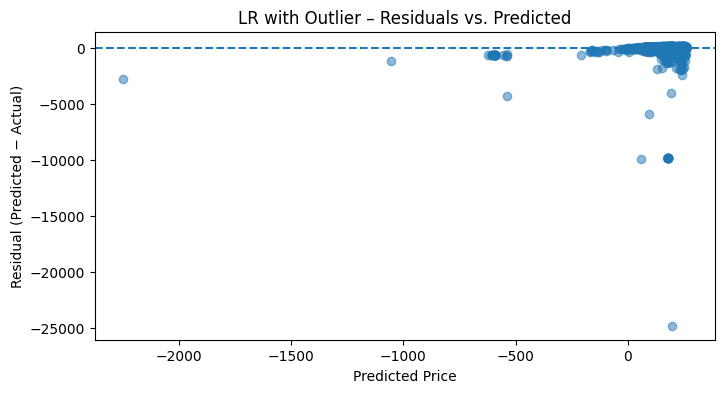

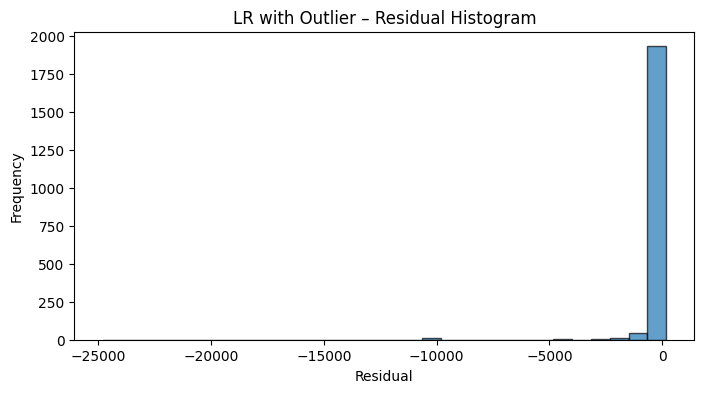

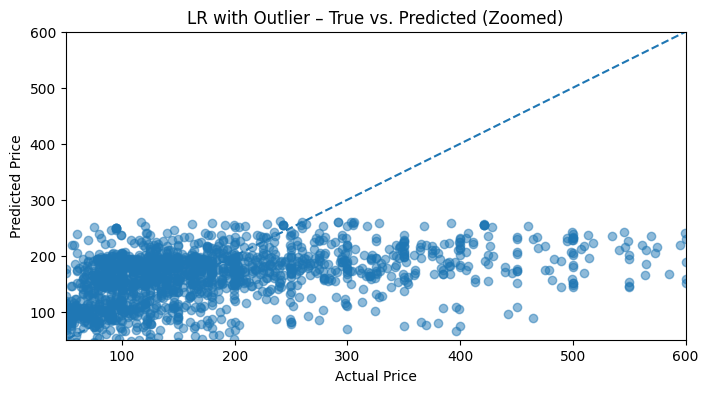


--- RF without Outlier ---
Training Random Forest...

Best Hyperparameters from Cross-Validation:
{'max_depth': 5, 'min_samples_split': 8, 'n_estimators': 200}

Training Data Evaluation:
Mean Squared Error (MSE): 726338.63
R^2 Score: 0.43

Test Data Evaluation:
Mean Squared Error (MSE): 22760.61
R^2 Score: 0.26

Baseline Performance on Test Data:
Mean Predictor - MSE: 41471.20, R^2: -0.35
Median Predictor - MSE: 33511.95, R^2: -0.09

Comparison with Baseline:
Improvement over Mean Baseline - MSE: 18710.59
Improvement over Median Baseline - MSE: 10751.34


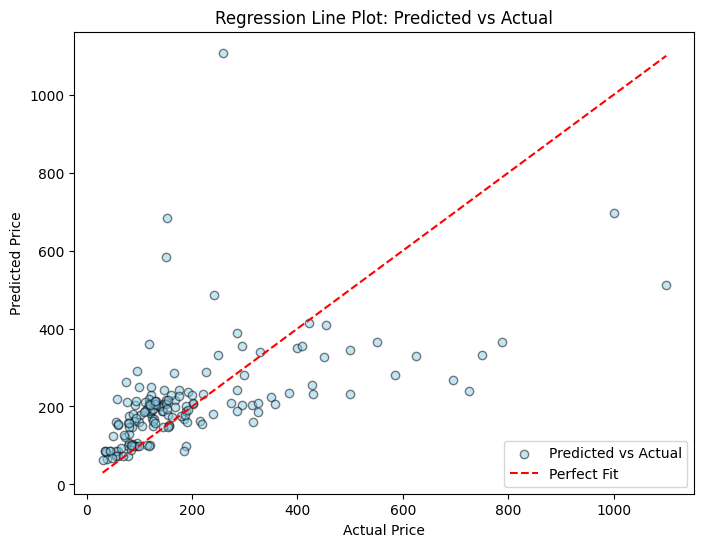

Test MSE: 1091222.35 | Test R²: -0.26


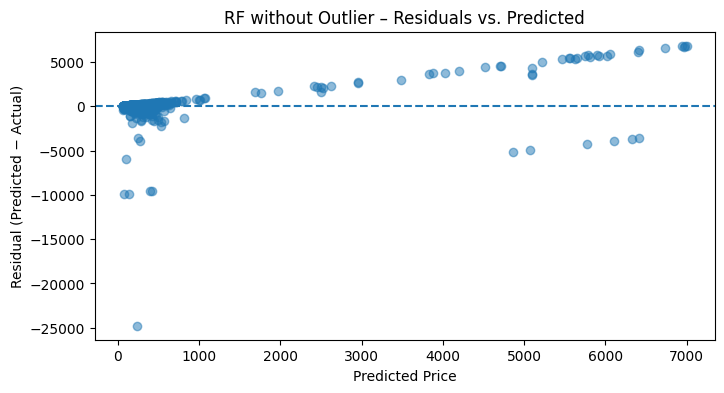

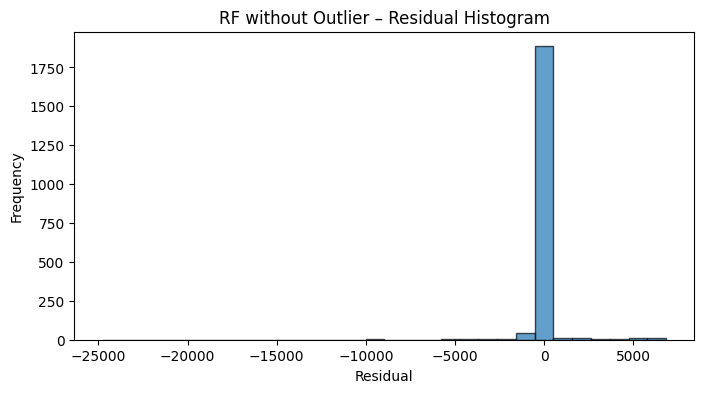

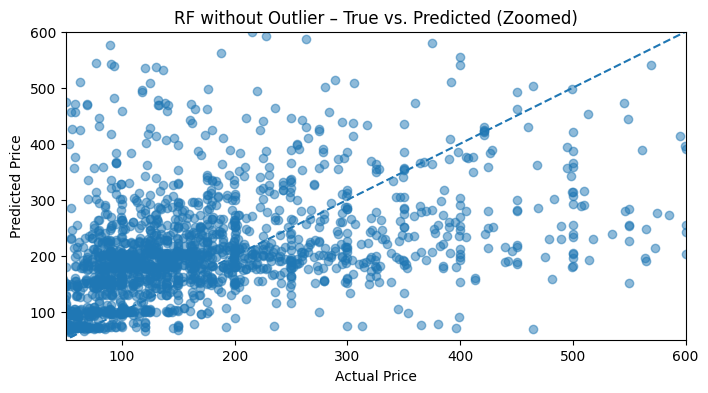


--- RF with Outlier ---

Removing outliers based on thresholds...
Training Random Forest...

Best Hyperparameters from Cross-Validation:
{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}

Training Data Evaluation:
Mean Squared Error (MSE): 4744.12
R^2 Score: 0.50

Test Data Evaluation:
Mean Squared Error (MSE): 4872.21
R^2 Score: 0.53

Baseline Performance on Test Data:
Mean Predictor - MSE: 10460.32, R^2: -0.00
Median Predictor - MSE: 11360.32, R^2: -0.09

Comparison with Baseline:
Improvement over Mean Baseline - MSE: 5588.11
Improvement over Median Baseline - MSE: 6488.11


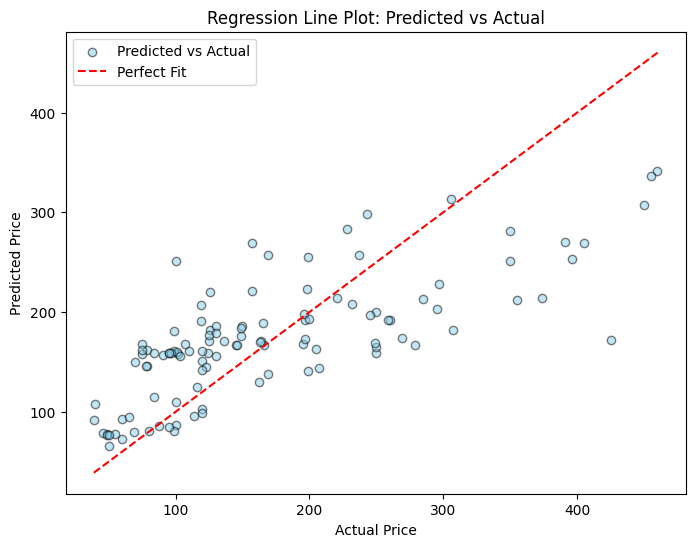

Test MSE: 872641.81 | Test R²: -0.01


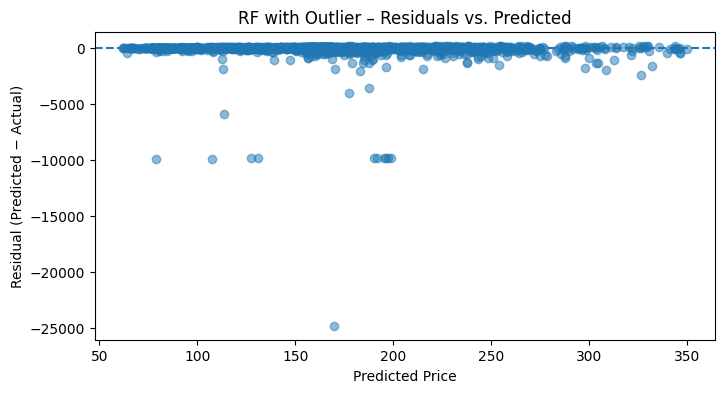

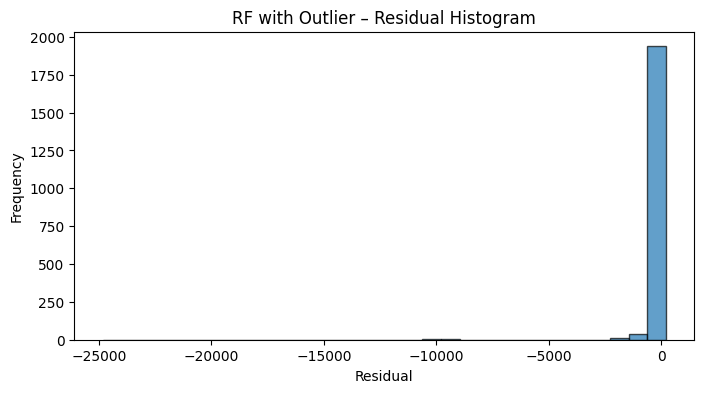

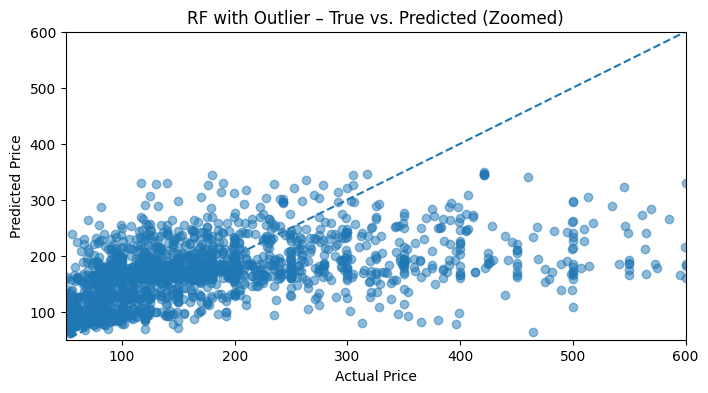

In [24]:
os.makedirs("results", exist_ok=True)

configs = [
    ("LR without Outlier",   False, "linear_regression"),
    ("LR with Outlier",      True,  "linear_regression"),
    ("RF without Outlier",   False, "random_forest"),
    ("RF with Outlier",      True,  "random_forest")
]

features = [
    'latitude', 'room_type', 'reviews_per_month', 'longitude',
    'neighbourhood', 'number_of_reviews_ltm',
    'availability_365', 'number_of_reviews', 'minimum_nights'
]

metrics = []

for name, drop_outliers, model_type in configs:
    print(f"\n--- {name} ---")
    model, scaler = process_pipeline(
        df.copy(),
        apply_outlier_removal=drop_outliers,
        model_type=model_type
    )

    # 1) Prepare test data
    X_test = df_test[features]
    y_test = df_test['price']

    # 2) Scale features
    X_test_scaled = scaler.transform(X_test)

    # 3) Predict
    y_pred = model.predict(X_test_scaled)

    # 4) Compute metrics
    mse = mean_squared_error(y_test, y_pred)
    r2  = r2_score(y_test, y_pred)
    print(f"Test MSE: {mse:.2f} | Test R²: {r2:.2f}")

    metrics.append({
        "config": name,
        "drop_outliers": drop_outliers,
        "model_type": model_type,
        "mse": mse,
        "r2": r2
    })

    # 5) Residual plot
    residuals = y_pred - y_test
    fig1, ax1 = plt.subplots(figsize=(8,4))
    ax1.scatter(y_pred, residuals, alpha=0.5)
    ax1.axhline(0, linestyle='--')
    ax1.set_title(f"{name} – Residuals vs. Predicted")
    ax1.set_xlabel('Predicted Price')
    ax1.set_ylabel('Residual (Predicted − Actual)')

    fn1 = os.path.join("results", f"residuals_{name.replace(' ', '_')}.png")
    fig1.savefig(fn1, dpi=300, bbox_inches="tight")
    plt.show()
    plt.close(fig1)

    # 6) Residual histogram
    fig2, ax2 = plt.subplots(figsize=(8,4))
    ax2.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
    ax2.set_title(f"{name} – Residual Histogram")
    ax2.set_xlabel('Residual')
    ax2.set_ylabel('Frequency')

    fn2 = os.path.join("results", f"hist_{name.replace(' ', '_')}.png")
    fig2.savefig(fn2, dpi=300, bbox_inches="tight")
    plt.show()
    plt.close(fig2)

    # 7) True vs. Predicted mit Identity-Line + Zoom

    fig3, ax3 = plt.subplots(figsize=(8,4))
    ax3.scatter(y_test, y_pred, alpha=0.5)

    # Identity line y = x
    mn = min(y_test.min(), y_pred.min())
    mx = max(y_test.max(), y_pred.max())
    ax3.plot([mn, mx], [mn, mx], linestyle='--')

    # Hier reinzoomen (5th–95th Perzentil)
    low = np.percentile(y_test, 5)
    high = np.percentile(y_test, 95)
    ax3.set_xlim(low, high)
    ax3.set_ylim(low, high)

    ax3.set_title(f"{name} – True vs. Predicted (Zoomed)")
    ax3.set_xlabel('Actual Price')
    ax3.set_ylabel('Predicted Price')

    fn3 = os.path.join("results", f"regline_zoomed_{name.replace(' ', '_')}.png")
    fig3.savefig(fn3, dpi=300, bbox_inches="tight")
    plt.show()
    plt.close(fig3)

    fn_model = os.path.join("results", f"model_{name.replace(' ', '_')}.pkl")
    with open(fn_model, "wb") as f:
        pickle.dump({
            "model": model,
            "scaler": scaler
        }, f)

metrics_df = pd.DataFrame(metrics)
metrics_df.to_csv("results/test_metrics.csv", index=False)